# Tablas de frecuencias

## Objetivos:

Aplicar el análisis de frecuencias en distintas variables según su clasificación e interpretar los resultados.

*Nota: Este laboratorio está diseñado para desarrollar razonamiento estadístico. Evita el uso de herramientas de IA para responder las preguntas a menos que esto sea explícitamente sugerido* 🤖. *En su lugar, enfócate en aplicar los conceptos revisados.*

## Actividad 1

Netflix es una de las plataformas de streaming más populares del mundo. En esta actividad, trabajarás con una base de datos real de títulos disponibles en Netflix. El objetivo es explorar algunas características del contenido y observar qué tan comunes son ciertos tipos de programas o películas.

Descarga la base de datos <a href="https://docs.google.com/spreadsheets/d/1E9w_qc7U09eaEcybEw08SOB5-JuIvSlM/export?format=xlsx">aquí</a> y responde las siguientes preguntas:

In [1]:
# Bibliotecas
import pandas as pd

# Creación de DataFrame (DF)
df_1 = pd.read_excel('Base_Netflix.xlsx')
df_1.head()

,ID,Tipo,Título,País,Año,Duración,Categoría
0,s47,Película,Safe House,"South Africa, United States, Japan",2012,115 min,Acción y Aventura
1,s82,Película,Kate,United States,2021,106 min,Acción y Aventura
2,s136,Película,Cliffhanger,"United States, Italy, France, Japan",1993,113 min,Acción y Aventura
3,s142,Película,Extraction,"United States, United Kingdom, Canada",2015,82 min,Acción y Aventura
4,s229,Película,The November Man,"United States, United Kingdom",2014,108 min,Acción y Aventura


1. Defina la población y muestra.

In [2]:
muestra_1 = df_1.shape[0]
muestra_1

7095

La población corresponde a los títulos disponibles en Netflix.

La muestra corresponde a 7.095 títulos disponibles en Netflix.

2. ¿Qué clasificación tiene la variable *Tipo*?

In [3]:
df_1['Tipo'].unique()

array(['Película', 'TV Show'], dtype=object)

La variable *Tipo* se clasifica como cualitativa nominal, ya que sus valores (película o TV show) corresponden a categorías sin un orden jerárquico.

3. ¿Qué tipo de contenido es más frecuente en la plataforma: películas o TV show (series)?

In [4]:
cuenta_tipo = df_1.groupby('Tipo').size()
cuenta_tipo

Tipo
Película    5673
TV Show     1422
dtype: int64

El contenido más frecuente en la plataforma corresponde a Películas con 5.673 títulos en comparación a TV show (series) con 1.422 títulos.

4. ¿Qué clasificación tiene la variable *Categoría*?

In [5]:
df_1['Categoría'].unique()

array(['Acción y Aventura', 'Anime', 'Películas familiares', 'Clásicos',
       'Comedia', 'Crimen', 'Documental', 'Docuseries', 'Dramas',
       'Horror', 'Películas', 'Niños', 'Musical', 'Reality Show',
       'Romántico', 'Ciencia Ficción', 'Stand-Up Comedy', 'Thrillers'],
      dtype=object)

La variable *Categoría* se clasifica como cualitativa nominal, ya que sus valores (Acción y Aventura, Ánime, Clásicos, etc.) corresponden a tipos de contenido sin un orden jerárquico.

5. ¿Cuál es la categoría de contenido más común? ¿A qué crees que se debe esto?

In [6]:
cuenta_categoria = df_1.groupby('Categoría').size()
cuenta_categoria

Categoría
Acción y Aventura        856
Anime                    173
Ciencia Ficción           14
Clásicos                 100
Comedia                 1266
Crimen                   358
Documental               759
Docuseries               175
Dramas                  1593
Horror                   273
Musical                   15
Niños                    318
Películas                165
Películas familiares     500
Reality Show              99
Romántico                 35
Stand-Up Comedy          334
Thrillers                 62
dtype: int64

La categoría más común en la plataforma corresponde a Drama con 1.593 títulos. Esto puede deberse a que este género es más versátil, ya que permite abordar una gran variedad de temáticas, atrayendo así, a un público más amplio.

6. Crea una tabla que contenga las frecuencias absolutas y relativas de la cantidad de títulos por categoría, luego interpreta el porcentaje de títulos clasificados como *Documental* y *Comedia*. ¿Qué diferencias observas?

In [7]:
#Utilizando la variable cuenta_categoría de la actividad anterior
#crearemos un nuevo DF con la frecuencia absoluta y relativa

tabla_1 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_categoria,
    'Frecuencia relativa (%)': round(cuenta_categoria / muestra_1 * 100, 1)
})

tabla_1

,Frecuencia absoluta,Frecuencia relativa (%)
Categoría,,
Acción y Aventura,856,12.1
Anime,173,2.4
Ciencia Ficción,14,0.2
Clásicos,100,1.4
Comedia,1266,17.8
Crimen,358,5.0
Documental,759,10.7
Docuseries,175,2.5
Dramas,1593,22.5


La categoría de comedia representa un 17,8% del total, mientras que los documentales solo alcanzan un 10,7%. Esta diferencia sugiere que el catálogo de Netflix prioriza el contenido de comedia por sobre el documental. Esto podría explicarse por la alta demanda de contenidos ligeros entre los usuarios, en comparación con los documentales que suelen estar orientados a un público más específico.

7. Considerando los 10 países con mayor cantidad de títulos, ¿cuál es el país con más presencia en la plataforma? ¿Qué inferencias puedes hacer al respecto? Para responder, crea una tabla de frecuencias absolutas y relativas.

In [8]:
#Cálculo de frecuencias absolutas
cuenta_pais = df_1.groupby('País').size()

#Creación de DF con frecuencias absolutas y relativas
tabla_2 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_pais,
    'Frecuencia relativa (%)': round(cuenta_pais/muestra_1 * 100, 1)
})

#La tabla es ordenada de mayor a menor, ascending= False,
#por los valores de frecuencia absoluta y se muestran los primeros 10 valores
tabla_2.sort_values('Frecuencia absoluta', ascending= False).head(10)

,Frecuencia absoluta,Frecuencia relativa (%)
País,,
United States,2779,39.2
India,918,12.9
United Kingdom,221,3.1
Japan,213,3.0
Canada,166,2.3
Spain,120,1.7
France,106,1.5
Mexico,96,1.4
Egypt,94,1.3


El país con mayor frecuencia en la plataforma es Estados Unidos, con 39,2% del total de títulos. Esto representa una proporción considerablemente mayor a la segunda prioridad, India, con un 12,9%. El resto de los países tienen una presencia mucho más baja, cada uno con menos de 4% del total. Esto sugiere una clara concentración del contenido en un número reducido de países, especialmente en Estados Unidos.

## Actividad 2

La siguiente base de datos contiene información de estudiantes pertenecientes a un Instituto Profesional. Con el fin de tomar decisiones institucionales, como reforzar asignaturas o rediseñar horarios se registraron datos sobre su rendimiento académico, género, jornada y número de asignaturas reprobadas.

Para responder las siguientes preguntas, descarga la base de datos **<a href="https://drive.google.com/uc?export=download&id=1Z2mrhxQnGgEfMqKrPyXBBPLnFPg52Woz
">aquí</a>**.

In [9]:
# Bibliotecas
import pandas as pd

# Creación de DataFrame (DF)
df_2 = pd.read_csv('Calificaciones.csv')
df_2.head()

,id,Género,Jornada,Asignaturas reprobadas,Semestre ingreso
0,1,Femenino,Diuna,0,Primero
1,2,Femenino,Diuna,3,Primero
2,3,Masculino,Diuna,4,Primero
3,4,Masculino,Diuna,1,Segundo
4,5,Femenino,Diuna,3,Primero


1. Define la población y la muestra del estudio.

In [10]:
muestra_2 = df_2.shape[0]
muestra_2

1000

La población corresponde a los estudiantes del Instituto profesional.

La muestra corresponde a 1000 estudiantes del instituto profesional.

2. ¿Cuál es la clasificación de las variables presentes en el estudio?

La clasificación de las variables es:

*  Género: cualitativa nominal.
*  Jornada: cualitativa nominal.
*  Asignaturas reprobadas: cuantitativa discreta.
*  Semestre ingreso: cualitativa ordinal.

3. ¿Cuál es el género más común entre los estudiantes? ¿Qué porcentaje representa?

In [11]:
#Calculamos la frecuencia absoluta
cuenta_genero = df_2.groupby('Género').size()

#Creamos el DF con frecuencias absolutas y relativas
tabla_3 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_genero,
    'Frecuencia relativa (%)': round(cuenta_genero/muestra_2 *100, 1)
})
tabla_3


,Frecuencia absoluta,Frecuencia relativa (%)
Género,,
Femenino,505,50.5
Masculino,495,49.5


El género más común entre los estudiantes del instituto es el femenino con 505 personas, las cuales representan un 50,5% del total. En contraste, el género masculino cuenta con 495 personas, correspondiente al 49,5%.

4. ¿Qué jornada tiene mayor representación en la muestra? ¿Hay alguna diferencia relevante entre ambas?

In [12]:
#Calculamos la frecuencia absoluta
cuenta_jornada = df_2.groupby('Jornada').size()

#Creamos el DF con frecuencias relativas
porcentaje_jornada = pd.DataFrame({
    'Frecuenacia relativa (%)': round(cuenta_jornada/muestra_2 * 100, 1)
})

porcentaje_jornada

,Frecuenacia relativa (%)
Jornada,
Diuna,64.9
Vespertina,35.1


La jornada que tiene mayor representación en la muestra es la Diurna con 64,9% del total. Es una diferencia importante considerando que la jornada vespertina tiene solo un 35,1% de representatividad. Si se toman decisiones institucionales basadas solo en esta muestra  existe el riesgo de generar sesgos que no reflejen adecuadamente la realidad del estudiante vespertino, cuyas necesidades y contextos suelen ser distintas a las del estudiante diurno.

5. Realiza una tabla de frecuencias para la variable Asignaturas reprobadas. La tabla debe mostrar las frecuencias puntuales y acumuladas, luego responde las siguientes preguntas:

  $\hspace{1cm}$ 5.1 ¿Cuál es la cantidad más común de asignaturas reprobadas?

In [13]:
#Frecuencia absoluta:
cuenta_reprobados = df_2.groupby('Asignaturas reprobadas').size()

#Tabla con 4 frecuencias
tabla_4 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_reprobados,
    'Frecuencia absoluta acumulada': cuenta_reprobados.cumsum(),
    'Frecuencia relativa (%)': cuenta_reprobados/muestra_2 * 100,
    'Frecuencia relativa acumulada (%)': (cuenta_reprobados/muestra_2 * 100).cumsum()
})
tabla_4

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Asignaturas reprobadas,,,,
0,81,81,8.1,8.1
1,200,281,20.0,28.1
2,211,492,21.1,49.2
3,199,691,19.9,69.1
4,209,900,20.9,90.0
5 o más,100,1000,10.0,100.0


211 personas declararon haber reprobado 2 asignaturas, esta corresponde a la cantidad más común.


$\hspace{1cm}$ 5.2. ¿Qué porcentaje de estudiantes ha reprobado 3 asignaturas o menos?

Un 69,1% de los estudiantes ha reprobado a lo más 3 asignaturas.

$\hspace{1cm}$ 5.3. Interpreta las siguientes frecuencias:

$\hspace{1cm}$ $F_{3}$: 492 estudiantes han reprobado a lo más 2 asignaturas.

$\hspace{1cm}$ $f_{1}$: 81 estudiantes no han reprobado asignaturas.

$\hspace{1cm}$ $H_{5}$:El 90% de los estudiantes ha reprobado a lo más 4 asignaturas.

$\hspace{1cm}$ $h_{2}$: Un 20% de los estudiantes ha reprobado una asignatura.

## Actividad 3

La base de datos utilizada en esta actividad corresponde al Informe Mundial de la Felicidad publicado por la ONU del año 2024. Contiene información de 140 países y evalúa el nivel de felicidad de sus habitantes en una escala continua (de 0 a 10), así como otros indicadores como el PIB per cápita, apoyo social, esperanza de vida saludable, percepción de corrupción y libertad para tomar decisiones de vida.

Para responder las siguientes preguntas, descarga la base de datos **<a href="https://drive.google.com/uc?export=download&id=1bKzL1MFdbfXMy9aYpGNt-SXlTrxEEL_9
">aquí</a>**.

*Log PIB per cápita, corresponde al logaritmo del Producto Interno Bruto per cápita. Esta transformación se usa para reducir la asimetría de la distribución del PIB per cápita y facilitar comparaciones cuando hay grandes diferencias entre países.*


In [14]:
# Bibliotecas
import pandas as pd

# Creación de DataFrame (DF)
df_3 = pd.read_csv('Reporte_felicidad_2024.csv')
df_3.head()

,Nombre del país,Indicador regional,Puntaje de felicidad,Log PIB per cápita,Apoyo social,Esperanza de vida saludable,"Libertad para tomar decisiones de vida,",Generosidad,Percepciones de corrupción,Distopía + residual
0,Finlandia,Europa occidental,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Dinamarca,Europa occidental,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Islandia,Europa occidental,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Suecia,Europa occidental,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Medio Oriente y Norte de África,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


1. Define la población y muestra del estudio.

In [15]:
muestra_3 = df_3.shape[0]
muestra_3

140

La población corresponde a los países del mundo.

La muestra corresponde a 140 países del mundo.

2. ¿Cuál es la clasificación de la variable *Puntaje de felicidad*?

La variable *Puntaje de felicidad* es cuantitativa continua, ya que puede tomar cualquier valore dentro del rango 0 a 10, incluyendo decimales.

3. Crea una tabla de frecuencias puntuales y acumuladas utilizando la variable *Puntaje de felicidad*. Considera crear la tabla de frecuencias con 8 intervalos.

In [16]:
#Crearemos una nueva columna llamada Intervalos_fel y la agregaremos al DF
#que contiene nuestra base de datos. Para ello utilizaremos la función cut,
#que nos permite dividir la variable Puntaje de felicidad en 8 intervalos
#de igual tamaño, asignando a cada país el intervalo correspondiente.
#Al usar el argumento include_lowest = True, nos aseguramos de que el valor mínimo
#de la variable Puntaje de felicidad quede incluído en el primer intervalo.
#La nueva columna llamada Intervalos_fel es una variable categórica.
df_3['Intervalos_fel'] = pd.cut(df_3['Puntaje de felicidad'], bins = 8, include_lowest= True, precision = 2)

#Calcularemos la frecuencia absoluta de la variable Intervalos_fel utilizando groupby.
#En este caso, se incluye el argumento observed=True para evitar una advertencia
#que aparece en versiones recientes de pandas. Esta advertencia indica que,
#en futuras versiones, el comportamiento por defecto de la función cambiará.
#Aunque no es obligatorio incluir este argumento, hacerlo desde ahora asegura
#compatibilidad futura y elimina el mensaje de advertencia al agrupar por variables categóricas.
cuenta_intervalos_fel = df_3.groupby('Intervalos_fel', observed = True).size()

tabla_5 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_intervalos_fel,
    'Frecuencia absoluta acumulada': cuenta_intervalos_fel.cumsum(),
    'Frecuencia relativa (%)': cuenta_intervalos_fel/muestra_3 * 100,
    'Frecuencia relativa acumulada (%)': (cuenta_intervalos_fel/muestra_3 * 100).cumsum()
})
round(tabla_5, 1)

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Intervalos_fel,,,,
"(1.7, 2.47]",1,1,0.7,0.7
"(2.47, 3.23]",2,3,1.4,2.1
"(3.23, 3.98]",14,17,10.0,12.1
"(3.98, 4.73]",19,36,13.6,25.7
"(4.73, 5.48]",25,61,17.9,43.6
"(5.48, 6.24]",34,95,24.3,67.9
"(6.24, 6.99]",34,129,24.3,92.1
"(6.99, 7.74]",11,140,7.9,100.0


4. Interpreta las siguientes frecuencias:

$\hspace{1cm}$ $f_{3}$: 14 países tienen un puntaje de felicidad mayor a 3,23 y menor o igual a 3,98.

$\hspace{1cm}$ $F_{5}$: 61 países tienen un puntaje de felicidad mayor a 1,7 y menor o igual a 5,48.

$\hspace{1cm}$ $h_{4}$: Un 13,6% de los países tienen un puntaje de felicidad mayor a 3,98 y menor o igual a 4,73.

$\hspace{1cm}$ $H_{6}$: Un 67,9% de los países tienen un puntaje de felicidad mayor a 1,7 y menor o igual a 6,24.

5. ¿Qué puedes concluir sobre la concentración de países según su nivel de felicidad? Para responder considera las siguientes categorías de nivel de felicidad:

* Baja: (1,70; 3,23]
* Media: (3,23; 4,73]
* Media-alta: (4,73; 6,24]
* Alta: (6,24; 7,74]

La categoría con más países es "media-alta" con 59 países (42,2%), seguida por la categoría "alta" con 45 países (32,2%). En conjunto, casi tres cuartos de los países (74,4%) presentan niveles de felicidad medio-altos o altos. En cambio, muy pocos países quedan en los niveles de felicidad "baja" (2,1%) o "media" (23,6%), lo que confirma que la mayoría se sitúa hacia los valores intermedios y altos de felicidad.

6. ¿Cómo se distribuyen los países según su PIB per cápita? Construye una tabla de frecuencias considerando 8 intervalos.

In [17]:
#Crearemos una nueva columna llamada Intervalos_pib
df_3['Intervalos_pib'] = pd.cut(df_3['Log PIB per cápita'], bins = 8, include_lowest= True, precision = 2)

#Calcularemos la frecuencia absoluta de la variable Intervalos_pib
cuenta_intervalos_pib = df_3.groupby('Intervalos_pib', observed = True).size()

tabla_6 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_intervalos_pib,
    'Frecuencia absoluta acumulada': cuenta_intervalos_pib.cumsum(),
    'Frecuencia relativa (%)': cuenta_intervalos_pib/muestra_3 * 100,
    'Frecuencia relativa acumulada (%)': (cuenta_intervalos_pib/muestra_3 * 100).cumsum()
})
round(tabla_6, 1)

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Intervalos_pib,,,,
"(-0.0121, 0.27]",1,1,0.7,0.7
"(0.27, 0.54]",1,2,0.7,1.4
"(0.54, 0.8]",17,19,12.1,13.6
"(0.8, 1.07]",15,34,10.7,24.3
"(1.07, 1.34]",23,57,16.4,40.7
"(1.34, 1.61]",33,90,23.6,64.3
"(1.61, 1.87]",37,127,26.4,90.7
"(1.87, 2.14]",13,140,9.3,100.0


7. Considera las siguientes categorías de nivel de PIB per cápita:
* Baja: (-0,0121; 0,54]
* Media: (0,54; 1,07]
* Media-alta: (1,07; 1,61]
* Alta: (1,61; 2,14]

Con base en la tabla de frecuencias del inciso anterior, ¿en qué categoría se concentra la mayoría de los países y qué conclusiones puedes extraer sobre su desarrollo económico?

La categoría con más países es "media-alta" con 56 países (40,0%), seguida de "alta" con 50 países (35,7%). En conjunto, casi las tres cuartas partes de la distribución (75,7%) se sitúa en niveles medio-altos o altos de ingreso per cápita. En cambio, muy pocos países quedan en las categorías "baja" (1,4%) o "media" (22,8%), lo que refuerza la concentración en rangos intermedios y altos de desarrollo económico.

8. ¿Hay relación entre un mayor PIB per cápita y un mayor puntaje de felicidad? 🤖 Utiliza la IA Gemini para generar un gráfico de dispersión y analiza si hay una tendencia clara entre ambas variables. Explica tus conclusiones con tus propias palabras.

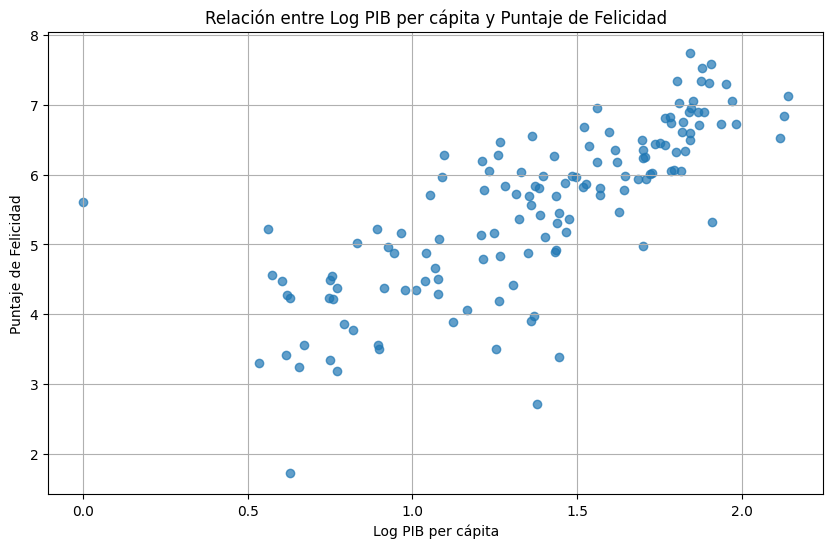

In [18]:
# prompt: Crea un gráfico que relacione la variable Log PIB per cápita con Puntaje de felicidad

import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.scatter(df_3['Log PIB per cápita'], df_3['Puntaje de felicidad'], alpha=0.7) #alpha para transparencia de puntos
plt.title('Relación entre Log PIB per cápita y Puntaje de Felicidad')
plt.xlabel('Log PIB per cápita')
plt.ylabel('Puntaje de Felicidad')
plt.grid(True) # Agrega una cuadrícula al gráfico
plt.show()


En el gráfico que relaciona el logaritmo del PIB per cápita con el puntaje de felicidad se observa que la nube de puntos tiene una tendencia ascendente. Esto quiere decir que, cuando el logaritmo del PIB per cápita aumenta, tiende a aumentar el puntaje de felicidad. Esto sugiere que los países con mayor ingreso per cápita suelen reportar niveles más altos de felicidad.

## Actividad 4

Para describir un conjunto de llamadas telefónicas se trabajará con una base de datos que contiene información del tiempo de duración y destino de 250  llamadas realizadas a algún país de América del Norte.

Descarga la base de datos **<a href="https://docs.google.com/spreadsheets/d/1KtiWhqgBecg_sKsGur_OCog5a0sU69NQ/export?format=xlsx
">aquí</a>**.


1. Define la población y la muestra del estudio.

La población corresponde a las llamadas realizadas a algún país de América del Norte.

La muestra corresponde a 250 llamadas realizadas a algún país de América del Norte.

2. Muestra las tres primeras filas y tres últimas filas de DataFrame.

In [19]:
# Bibliotecas
import pandas as pd

# Creación de DataFrame (DF)
df_4 = pd.read_excel('Llamadas.xlsx')

#Primeras 3 filas
df_4.head(3)

,Registro llamada,Destino,Tiempo (en minutos)
0,150131774,Canadá,35.3
1,150131698,Canadá,19.4
2,150131725,Estados Unidos,50.4


In [20]:
#Últimas 3 filas
df_4.tail(3)

,Registro llamada,Destino,Tiempo (en minutos)
247,150131799,México,39.1
248,150131663,México,20.3
249,150131624,Estados Unidos,34.8


3. Clasifica las variables relevantes en el estudio.

Las variables relevantes del estudio son:

*   Destino: cualitativa nominal.
*   Tiempo (en minutos): cuantitativa continua.



4. Construye una tabla de distribución de frecuencias para la variable tiempo de duración de las llamadas considerando frecuencias puntuales y acumuladas. Para la construcción de la tabla considera 9 intervalos.

In [21]:
#Crearemos una nueva columna llamada Intervalos_tiempo
df_4['Intervalos_tiempo'] = pd.cut(df_4['Tiempo (en minutos)'], bins = 9, include_lowest= True, precision = 1)

#Calcularemos la frecuencia absoluta de la variable Intervalos_tiempo
cuenta_intervalos_tiempo = df_4.groupby('Intervalos_tiempo', observed = True).size()

tabla_7 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_intervalos_tiempo,
    'Frecuencia absoluta acumulada': cuenta_intervalos_tiempo.cumsum(),
    'Frecuencia relativa (%)': cuenta_intervalos_tiempo/250 * 100,
    'Frecuencia relativa acumulada (%)': (cuenta_intervalos_tiempo/250 * 100).cumsum()
})
round(tabla_7, 1)

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Intervalos_tiempo,,,,
"(3.9999999999999996, 10.0]",12,12,4.8,4.8
"(10.0, 15.7]",17,29,6.8,11.6
"(15.7, 21.5]",32,61,12.8,24.4
"(21.5, 27.2]",57,118,22.8,47.2
"(27.2, 33.0]",56,174,22.4,69.6
"(33.0, 38.7]",34,208,13.6,83.2
"(38.7, 44.5]",25,233,10.0,93.2
"(44.5, 50.2]",10,243,4.0,97.2
"(50.2, 56.0]",7,250,2.8,100.0


5. A partir de la pregunta anterior, interpreta las siguientes frecuencias:

$\hspace{1cm}$ $f_{6}$: 34 llamadas tienen una duración mayor a 33 minutos y menor o igual a 38,7 minutos.

$\hspace{1cm}$ $h_{2}$: El 6,8% de las llamadas tienen una duración mayor a 10 minutos y menor o igual a 15,7 minutos.

$\hspace{1cm}$ $F_{4}$: 118 llamadas tienen una duración mayor a 4 minutos y menor o igual a 27,2 minutos.

$\hspace{1cm}$ $H_{3}$: El 24,4% de las llamadas tienen una duración mayor a 4 minutos y menor o igual a 21,5 minutos.

## Actividad 5

A continuación, se presentan datos nacionales por comuna de la medición SIMCE de octavo básico rendida en el año 2015.

Descarga la base de datos <a href="https://docs.google.com/spreadsheets/d/1fIGstVw-dQfA5WMq9mvhx3wVOHCXbrpj/export?format=xlsx">aquí</a> y responde las siguientes preguntas:

1. Construye una tabla de distribución de frecuencias (absolutas y porcentuales incluyendo las acumuladas) que resuma los puntajes obtenidos en la prueba SIMCE de Matemática. Considera 9 intervalos para la construcción de la tabla.

$\hspace{1cm}$ *Observaciones: Se debe escoger la variable prom_mate8b_com*

In [22]:
# Bibliotecas
import pandas as pd

# Creación de DataFrame (DF)
df_5 = pd.read_excel('SIMCE.xlsx')
df_5.head()

,agno,fecha_bbdd,codigo_bbdd,grado,cod_reg,nom_reg,cod_pro,nom_pro,cod_com,nom_com,...,nalu_nat8b_com,prom_lect8b_com,prom_mate8b_com,prom_nat8b_com,dif_lect8b_com,dif_mate8b_com,dif_nat8b_com,sigdif_lect8b_com,sigdif_mate8b_com,sigdif_nat8b_com
0,2015,20160908,final20160908v1,8b,11,AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO,2,AISÉN,1,AISÉN,...,312,237,257,263,3.0,7.0,-9.0,No significativa,No significativa,No significativa
1,2015,20160908,final20160908v1,8b,5,VALPARAÍSO,6,SAN ANTONIO,13,ALGARROBO,...,146,235,251,257,-1.0,2.0,-13.0,No significativa,No significativa,Negativa y significativa
2,2015,20160908,final20160908v1,8b,13,METROPOLITANA DE SANTIAGO,5,MELIPILLA,43,ALHUÉ,...,67,213,236,240,25.0,15.0,-14.0,Positiva y significativa,Positiva y significativa,Negativa y significativa
3,2015,20160908,final20160908v1,8b,8,BIOBÍO,3,BIOBÍO,8,ALTO BIOBÍO,...,67,207,200,218,2.0,-4.0,-9.0,No significativa,No significativa,No significativa
4,2015,20160908,final20160908v1,8b,3,ATACAMA,3,HUASCO,6,ALTO DEL CARMEN,...,50,226,227,244,8.0,5.0,-2.0,No significativa,No significativa,No significativa


In [23]:
muestra_5 = df_5.shape[0]
muestra_5

344

In [24]:
#Crearemos una nueva columna llamada Intervalos_punt
df_5['Intervalos_punt'] = pd.cut(df_5['prom_mate8b_com'], bins = 9, include_lowest= True, precision = 0)

#Calcularemos la frecuencia absoluta de la variable Intervalos_punt
cuenta_intervalos_punt= df_5.groupby('Intervalos_punt', observed = True).size()

tabla_8 = pd.DataFrame({
    'Frecuencia absoluta': cuenta_intervalos_punt,
    'Frecuencia absoluta acumulada': cuenta_intervalos_punt.cumsum(),
    'Frecuencia relativa (%)': cuenta_intervalos_punt/muestra_5 * 100,
    'Frecuencia relativa acumulada (%)': (cuenta_intervalos_punt/muestra_5 * 100).cumsum()
})
round(tabla_8, 1)

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Intervalos_punt,,,,
"(193.0, 207.0]",2,2,0.6,0.6
"(207.0, 220.0]",4,6,1.2,1.7
"(220.0, 233.0]",29,35,8.4,10.2
"(233.0, 246.0]",88,123,25.6,35.8
"(246.0, 260.0]",118,241,34.3,70.1
"(260.0, 273.0]",80,321,23.3,93.3
"(273.0, 286.0]",16,337,4.7,98.0
"(286.0, 299.0]",2,339,0.6,98.5
"(299.0, 312.0]",5,344,1.5,100.0


2. ¿Es correcto afirmar que los resultados de Matemática se concentran en los puntajes más bajos? Justifica tu respuesta.

No es cierta la afirmación. Todos los puntajes están comprendidos entre 193 y 312 puntos aproximadamente. De estos, la mayor concentración de estudiantes (83,2%) se observa en los valores medios de la tabla, específicamente entre los 233 puntos y los 273 puntos aproximadamente.

3.  Diseñe una tabla de frecuencias relativas que resuma la información de la cantidad de comunas por región. Realice observaciones de los datos de la tabla y construya una hipótesis al respecto.

In [25]:
#Calcularemos la frecuencia absoluta de la variable nombre región
cuenta_comunas= df_5.groupby(['nom_reg']).size()


tabla_9 = pd.DataFrame({
    'Frecuencia relativa (%)': cuenta_comunas/muestra_5 * 100
})

#Mostramos la tabla redondeada a un decimal y ordenada de forma ascendente
round(tabla_9,1).sort_values('Frecuencia relativa (%)')

,Frecuencia relativa (%)
nom_reg,
ARICA Y PARINACOTA,1.2
TARAPACÁ,2.0
ANTOFAGASTA,2.6
ATACAMA,2.6
MAGALLANES Y DE LA ANTÁRTICA CHILENA,2.6
AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO,2.9
LOS RÍOS,3.5
COQUIMBO,4.4
LOS LAGOS,8.7


Las regiones con mayor proporción de comunas con datos disponibles de puntaje SIMCE en el año 2015 son Biobío (15,7%), Metropolitana de Santiago (15,1%) y Valparaíso (11,0%). Mientras que las regiones con menor representación en la base de datos son Arica y Parinacota (1,2%) y Tarapacá (2,0%), lo que sugiere que estas regiones tienen menos comunas en total en comparación a las otras regiones del país.

Hipótesis:

La mayor cantidad de comunas en las regiones de Biobío, Metropolitana de Santiago y Valparaíso podría deberse a una mayor fragmentación administrativa de su territorio, provocada por una alta densidad poblacional o por condiciones geográficas. En cambio, las regiones del extremo norte y sur, con menor frecuencia relativa, suelen ser zonas extensas con baja densidad poblacional  y, por lo tanto, con un número reducido de municipios.